In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = '../data/movielens/ml-32m/'

ratings = pd.read_csv(data_path + 'ratings.csv', usecols=['userId', 'movieId', 'rating'], nrows=1000000)
movies = pd.read_csv(data_path + 'movies.csv', usecols=['movieId', 'genres'])

In [19]:
ratings.head()

,userId,movieId,rating
0,1,17,4.0
1,1,25,1.0
2,1,29,2.0
3,1,30,5.0
4,1,32,5.0


In [20]:
movies.head()

,movieId,genres
0,1,Adventure|Animation|Children|Comedy|Fantasy
1,2,Adventure|Children|Fantasy
2,3,Comedy|Romance
3,4,Comedy|Drama|Romance
4,5,Comedy


In [21]:
df = pd.merge(ratings[['userId', 'rating', 'movieId']], movies[['movieId', 'genres']], on='movieId', how='left')
df.head()

,userId,rating,movieId,genres
0,1,4.0,17,Drama|Romance
1,1,1.0,25,Drama|Romance
2,1,2.0,29,Adventure|Drama|Fantasy|Mystery|Sci-Fi
3,1,5.0,30,Crime|Drama
4,1,5.0,32,Mystery|Sci-Fi|Thriller


In [22]:
exploded = df.assign(genre=df['genres'].str.split('|')).explode('genre')
exploded.head()

,userId,rating,movieId,genres,genre
0,1,4.0,17,Drama|Romance,Drama
0,1,4.0,17,Drama|Romance,Romance
1,1,1.0,25,Drama|Romance,Drama
1,1,1.0,25,Drama|Romance,Romance
2,1,2.0,29,Adventure|Drama|Fantasy|Mystery|Sci-Fi,Adventure


In [23]:
result = exploded.groupby(["userId", "genre"], as_index=False)["rating"].mean().pivot(index="userId", columns="genre", values="rating")
result.head()

genre,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
userId,,,,,,,,,,,,,,,,,,,,
1,NaN,4.105263,3.470588,NaN,3.500000,3.333333,3.875000,3.0,3.549020,2.500000,5.0,3.666667,NaN,NaN,3.700000,3.250000,3.941176,3.500000,3.318182,3.5
2,NaN,3.888889,4.142857,4.875000,4.727273,4.000000,3.500000,NaN,4.458333,4.750000,NaN,1.000000,5.000000,4.857143,5.000000,4.761905,NaN,4.181818,4.000000,NaN
3,NaN,3.560345,3.620690,3.958333,3.775000,3.203704,3.406250,NaN,4.169811,3.117647,NaN,2.375000,4.250000,3.850000,3.666667,3.714286,3.428571,3.468750,4.083333,3.5
4,NaN,2.454545,3.400000,NaN,NaN,3.142857,2.000000,NaN,2.375000,3.333333,NaN,2.571429,NaN,NaN,3.000000,NaN,2.800000,2.166667,2.500000,NaN
5,NaN,3.642857,3.461538,3.666667,3.500000,3.000000,2.888889,NaN,3.153846,3.000000,NaN,2.500000,3.666667,3.666667,3.000000,3.750000,3.200000,3.562500,4.000000,3.0


In [24]:
result.shape

(6503, 20)

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([("imputer", SimpleImputer(strategy="constant", fill_value=0)), ("scaler", StandardScaler())])

scaled = pipe.fit_transform(result)

In [30]:
scaled.shape

(6503, 20)

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(scaled)

,"n_components n_components: int, float or 'mle', default=NoneNumber of components to keep.if n_components is not set all components are kept:: n_components == min(n_samples, n_features)If ``n_components == 'mle'`` and ``svd_solver == 'full'``, Minka'sMLE is used to guess the dimension. Use of ``n_components == 'mle'``will interpret ``svd_solver == 'auto'`` as ``svd_solver == 'full'``.If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select thenumber of components such that the amount of variance that needs to beexplained is greater than the percentage specified by n_components.If ``svd_solver == 'arpack'``, the number of components must bestrictly less than the minimum of n_features and n_samples.Hence, the None case results in:: n_components == min(n_samples, n_features) - 1",5
,"copy copy: bool, default=TrueIf False, data passed to fit are overwritten and runningfit(X).transform(X) will not yield the expected results,use fit_transform(X) instead.",True
,"whiten whiten: bool, default=FalseWhen True (False by default) the `components_` vectors are multipliedby the square root of n_samples and then divided by the singular valuesto ensure uncorrelated outputs with unit component-wise variances.Whitening will remove some information from the transformed signal(the relative variance scales of the components) but can sometimeimprove the predictive accuracy of the downstream estimators bymaking their data respect some hard-wired assumptions.",False
,"svd_solver svd_solver: {'auto', 'full', 'covariance_eigh', 'arpack', 'randomized'}, default='auto'""auto"" : The solver is selected by a default 'auto' policy is based on `X.shape` and `n_components`: if the input data has fewer than 1000 features and more than 10 times as many samples, then the ""covariance_eigh"" solver is used. Otherwise, if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ""randomized"" method is selected. Otherwise the exact ""full"" SVD is computed and optionally truncated afterwards.""full"" : Run exact full SVD calling the standard LAPACK solver via `scipy.linalg.svd` and select the components by postprocessing""covariance_eigh"" : Precompute the covariance matrix (on centered data), run a classical eigenvalue decomposition on the covariance matrix typically using LAPACK and select the components by postprocessing. This solver is very efficient for n_samples >> n_features and small n_features. It is, however, not tractable otherwise for large n_features (large memory footprint required to materialize the covariance matrix). Also note that compared to the ""full"" solver, this solver effectively doubles the condition number and is therefore less numerical stable (e.g. on input data with a large range of singular values).""arpack"" : Run SVD truncated to `n_components` calling ARPACK solver via `scipy.sparse.linalg.svds`. It requires strictly `0 < n_components < min(X.shape)`""randomized"" : Run randomized SVD by the method of Halko et al... versionadded:: 0.18.0.. versionchanged:: 1.5 Added the 'covariance_eigh' solver.",'auto'
,"tol tol: float, default=0.0Tolerance for singular values computed by svd_solver == 'arpack'.Must be of range [0.0, infinity)... versionadded:: 0.18.0",0.0
,"iterated_power iterated_power: int or 'auto', default='auto'Number of iterations for the power method computed bysvd_solver == 'randomized'.Must be of range [0, infinity)... versionadded:: 0.18.0",'auto'
,"n_oversamples n_oversamples: int, default=10This parameter is only relevant when `svd_solver=""randomized""`.It corresponds to the additional number of random vectors to sample therange of `X` so as to ensure proper conditioning. See:func:`~sklearn.utils.extmath.randomized_svd` for more details... versionadded:: 1.1",10
,"power_iteration_normalizer power_iteration_normalizer: {'auto', 'QR', 'LU', 'none'}, default='auto'Power iteration normalizer for randomized SVD 

In [36]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.29780053 0.10842698 0.08513701 0.05212912 0.05082227]
[196.80431023 118.75189418 105.22793922  82.34022763  81.30156436]


In [38]:
reduced = pca.transform(scaled)

In [39]:
reduced.shape

(6503, 5)

In [42]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
embedded = tsne.fit_transform(reduced)

In [54]:
embedded_nopca = tsne.fit_transform(scaled)

In [55]:
print(embedded.shape, embedded_nopca.shape)

(6503, 2) (6503, 2)


Text(0.5, 1.0, 'scaled, no pca')

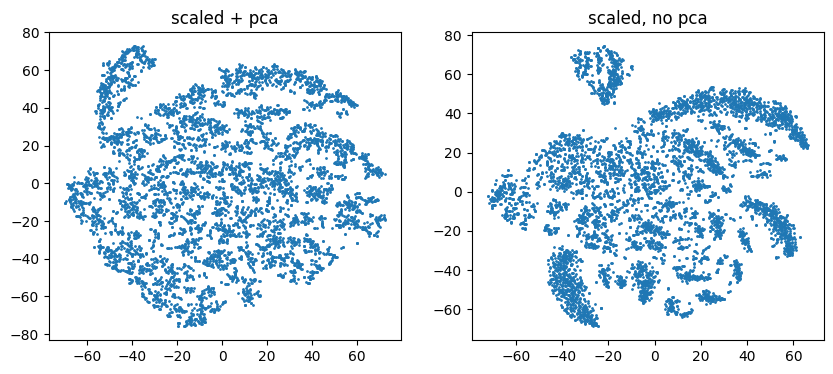

In [56]:
fig, ax = plt.subplots(1, 2, figsize= (10,4))
ax[0].scatter(embedded[:,0], embedded[:,1], s=1)
ax[0].set_title("scaled + pca")
ax[1].scatter(embedded_nopca[:,0], embedded_nopca[:,1], s=1)
ax[1].set_title("scaled, no pca")